<a href="https://colab.research.google.com/github/Orange314159/DataScience/blob/main/MatthewRobsonUnitThreeExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install preliz -q

In [2]:
import preliz as pz

# Unit 3 Exercises: Delightfully Diverse Distirbutions

Use these exercises as a chance to explore the probability distributions (dists) from the pymc and preliz libraries. [Moments](https://en.wikipedia.org/wiki/Moment_(mathematics)), the main subject of these exercises, are a great way to describe dists, but there's another  way: [maximum entropy](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution#Other_examples), which, although important, we will not cover in detail.

Here's what we'll cover in this Unit's exercises:
- The first four moments: mean, variance, skew, and kurtosis, as well as the support.
- Single variable continuous distributions.
- Single variable discrete distriutions


Why do we need to know this stuff? Two reasons:
- Probability distributions are required to set priors and likelihoods in pymc.
- Randomness and uncertainty are not well defined mathematically, but probability and probability distributions are.

With that in mind, think of these exercises as an oppurtunity to explore the ways we can be uncertain, or the ways things can be random.

## The First Four Moments: Mean, Variance, Skew, and Kurtosis

When we talk about a probablity dist, we often care about at four things:
- The expected value, or where a distribution is centered (mean)
- The amount of variation from that centered value (variation)
- Whether or not our distribution favors, leans towards, or skews towards certain values. (skew)
- How often to expect unusually high or low values. (kurtosis)

### Playing with Beta

**Task1**:

Plot a [preliZ Beta distribution](https://preliz.readthedocs.io/en/latest/api_reference.html#preliz.distributions.beta.Beta) with $α=1$ and $β=1$.

<Axes: >

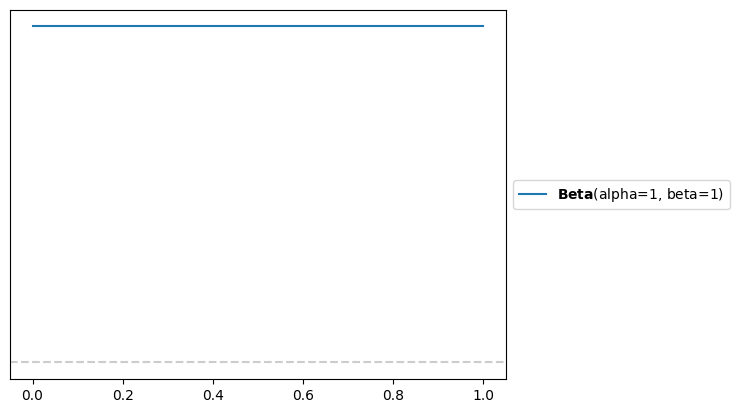

In [3]:
pz.Beta(alpha=1,beta=1).plot_pdf()

**Task2**:

Find the mean, variance, skew, and kurtosis of a $Beta(1,1)$ distribution. This is the same as asking for the first four moments of a $Beta(1,1)$ distribution.

*Hint*: preliZ has built in function that does this for you.

In [4]:
for x in pz.Beta(alpha=1,beta=1).moments():
  print(x, end="\t")
print("\n", pz.Beta(alpha=1,beta=1).moments())


0.5	0.08333333333333333	0.0	-1.2	
 [np.float64(0.5), np.float64(0.08333333333333333), array(0.), np.float64(-1.2)]


**Task3**:

Plot the following distributions on seperate graphs: $Beta(1,1)$, $Beta(0.9,0.9)$, $Beta(2,1)$, $Beta(1,2)$, $Beta(7,11)$, $Beta(96,42)$, $Beta(5,5)$, $Beta(500,500)$, $Beta(0.8,0.9)$.

Then, determine which of those distribtuions has:
- the largest/smallest mean
- the largest/smallest variance
- the largest/smallest skew
- the largest/smallest kurtosis

and show the code you used to find that information.

<Axes: >

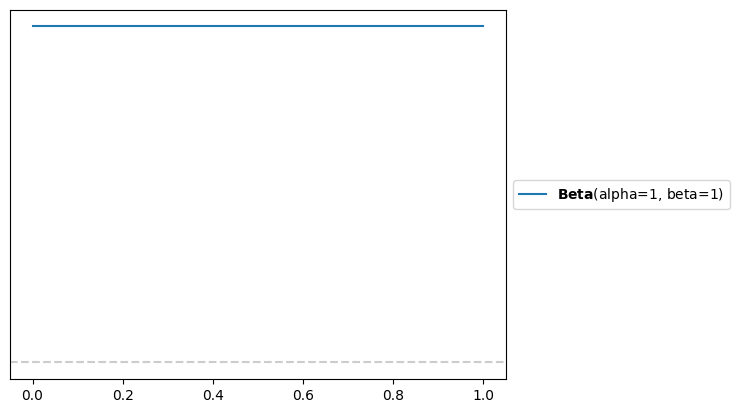

In [5]:
pz.Beta(alpha=1,beta=1).plot_pdf()

<Axes: >

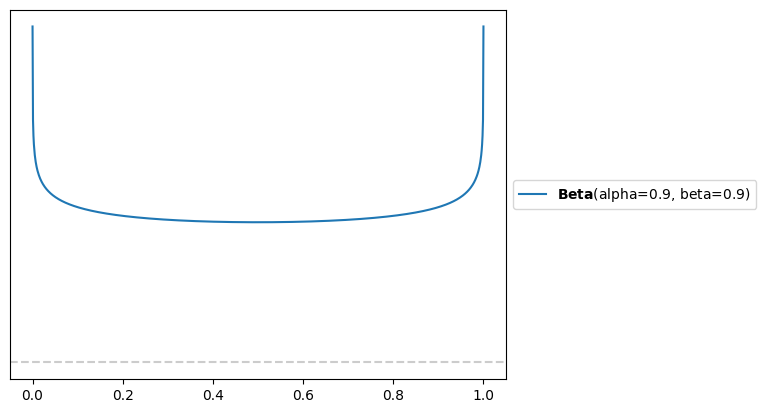

In [6]:
pz.Beta(alpha=0.9,beta=0.9).plot_pdf()

<Axes: >

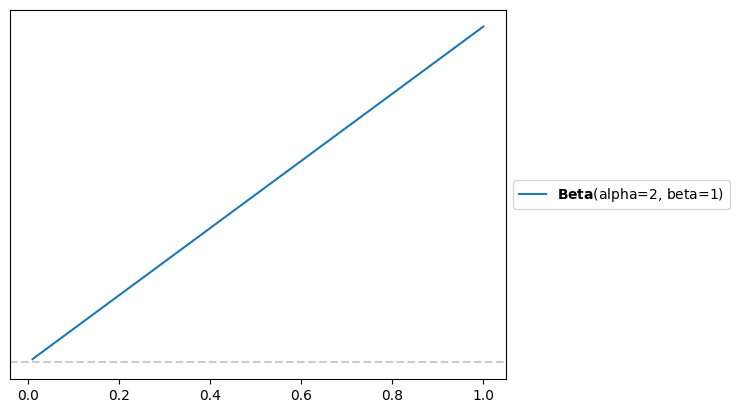

In [7]:
pz.Beta(alpha=2,beta=1).plot_pdf()

<Axes: >

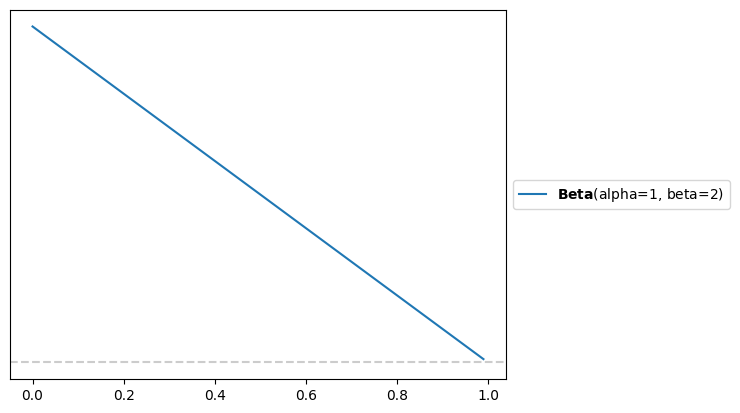

In [8]:
pz.Beta(alpha=1,beta=2).plot_pdf()

<Axes: >

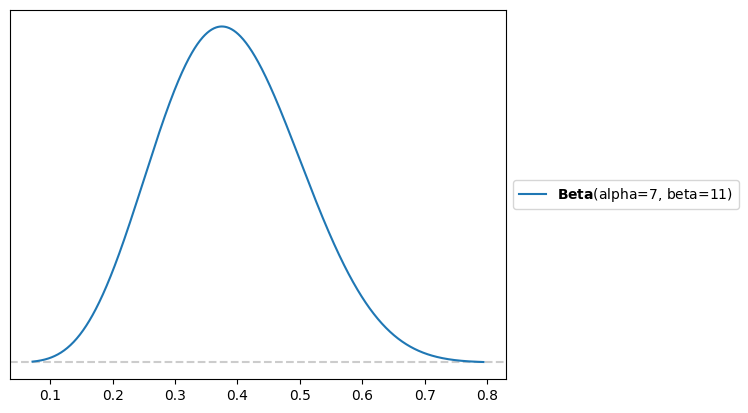

In [9]:
pz.Beta(alpha=7,beta=11).plot_pdf()

<Axes: >

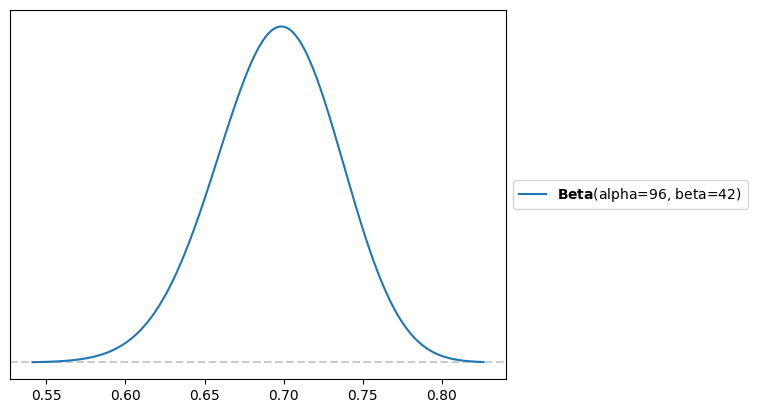

In [10]:
pz.Beta(alpha=96,beta=42).plot_pdf()

<Axes: >

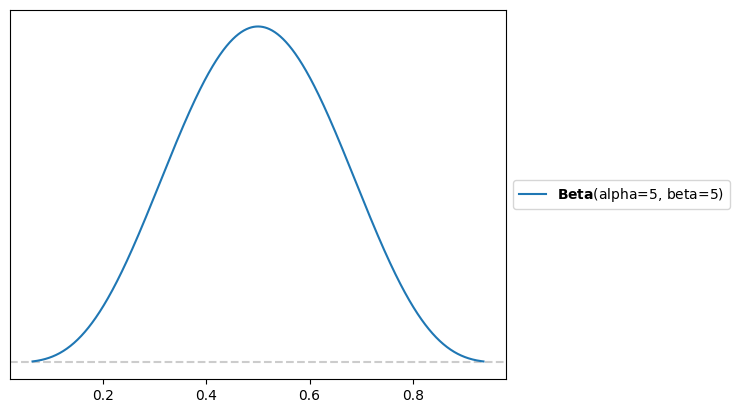

In [11]:
pz.Beta(alpha=5,beta=5).plot_pdf()

<Axes: >

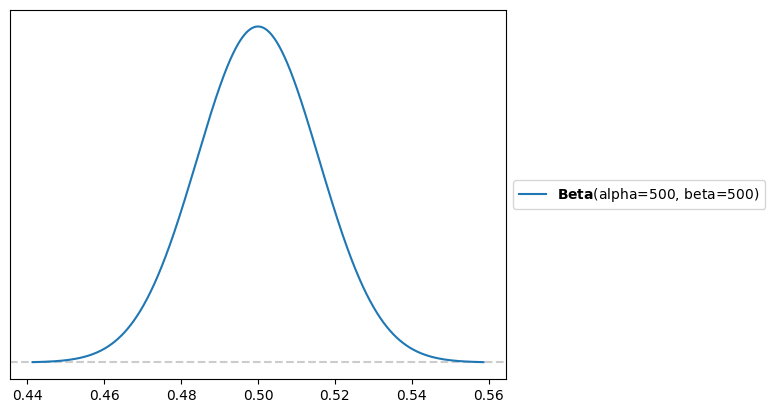

In [12]:
pz.Beta(alpha=500,beta=500).plot_pdf()

<Axes: >

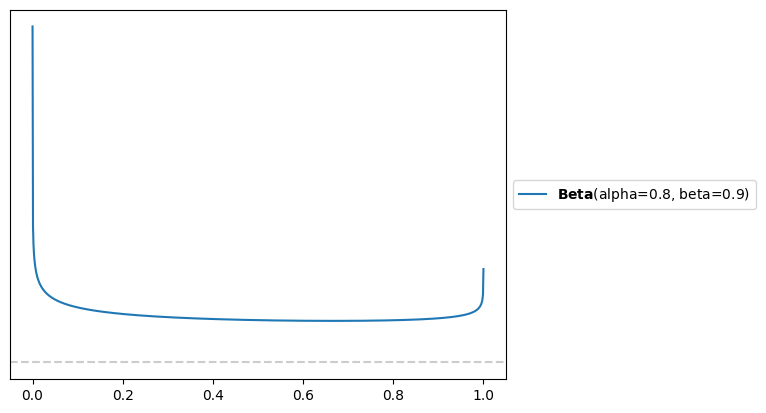

In [13]:
pz.Beta(alpha=0.8,beta=0.9).plot_pdf()

In [14]:
moments = [
  pz.Beta(alpha=1,beta=1).moments(),
  pz.Beta(alpha=0.9,beta=0.9).moments(),
  pz.Beta(alpha=2,beta=1).moments(),
  pz.Beta(alpha=1,beta=2).moments(),
  pz.Beta(alpha=11,beta=11).moments(),
  pz.Beta(alpha=96,beta=42).moments(),
  pz.Beta(alpha=5,beta=5).moments(),
  pz.Beta(alpha=500,beta=500).moments(),
  pz.Beta(alpha=0.8,beta=0.9).moments(),
]

import numpy as np
# print(moments)
moments = np.transpose(moments)
moments = np.transpose(moments)

# new_col_values = np.array(["Row1", "Row1","Row1","Row1","Row1","Row1","Row1","Row1","Row1","Row1"]) # Values for the new column

# moments = np.insert(moments, 0, new_col_values, axis=1)

import polars as pl
df = pl.DataFrame(moments)

# add labels to values
labels = ["Beta(1,1)", "Beta(0.9,0.9)", "Beta(2, 1)", "Beta(1, 2)", "Beta(7, 11)", "Beta(96, 42)", "Beta(5, 5)", "Beta(500, 500)", "Beta(0.8, 0.9)"]
df = df.with_columns(pl.Series(name="labels", values=labels))


## The regular headers are very long and I don't want them here
pl.Config.set_tbl_hide_column_names(True)
# print(pz.Beta(alpha=1,beta=1).moments())
# Print out the table for refrence
print(df)

# Print out each of the requested pieces of information
print("The following is the sorted means")
print(str(df.sort(df.columns[0], descending=True)).split("\n", 1)[1])

print("The following is the sorted variances")
print(str(df.sort(df.columns[1], descending=True)).split("\n", 1)[1])

print("The following is the sorted skews")
print(str(df.sort(df.columns[2], descending=True)).split("\n", 1)[1])

print("The following is the sorted kurtosises")
print(str(df.sort(df.columns[3], descending=True)).split("\n", 1)[1])

shape: (9, 5)
┌──────────┬──────────┬───────────┬───────────┬────────────────┐
│ f64      ┆ f64      ┆ f64       ┆ f64       ┆ str            │
╞══════════╪══════════╪═══════════╪═══════════╪════════════════╡
│ 0.5      ┆ 0.083333 ┆ 0.0       ┆ -1.2      ┆ Beta(1,1)      │
│ 0.5      ┆ 0.089286 ┆ 0.0       ┆ -1.25     ┆ Beta(0.9,0.9)  │
│ 0.666667 ┆ 0.055556 ┆ -0.565685 ┆ -0.6      ┆ Beta(2, 1)     │
│ 0.333333 ┆ 0.055556 ┆ 0.565685  ┆ -0.6      ┆ Beta(1, 2)     │
│ 0.5      ┆ 0.01087  ┆ 0.0       ┆ -0.24     ┆ Beta(7, 11)    │
│ 0.695652 ┆ 0.001523 ┆ -0.143233 ┆ -0.011998 ┆ Beta(96, 42)   │
│ 0.5      ┆ 0.022727 ┆ 0.0       ┆ -0.461538 ┆ Beta(5, 5)     │
│ 0.5      ┆ 0.00025  ┆ 0.0       ┆ -0.005982 ┆ Beta(500, 500) │
│ 0.470588 ┆ 0.092272 ┆ 0.104675  ┆ -1.263657 ┆ Beta(0.8, 0.9) │
└──────────┴──────────┴───────────┴───────────┴────────────────┘
The following is the sorted means
┌──────────┬──────────┬───────────┬───────────┬────────────────┐
│ f64      ┆ f64      ┆ f64       ┆ f64   

###Playing with other Continuous Distributions

For the remaining tasks, make sure to continue to use the [preliZ documentation](https://preliz.readthedocs.io/en/latest/api_reference.html).

The [wikipedia pages for each of the probability distributions](https://en.wikipedia.org/wiki/List_of_probability_distributions) are also great resources.

[Wolfram Alpha](https://www.wolframalpha.com/examples/mathematics/probability/probability-distributions) is another great resource as well.

**Task4**:

Plot the pdfs of each of the following distributions on the same graph: $Normal(μ=0,σ=1)$, $StudentT(ν=1,μ=0,σ=1)$

Then, plot these on the same graph: $Exponential(λ=1/2)$, $Gamma(α=2,β=1)$, $HalfStudentT(ν=1,σ1)$

For the t distribution and half t, use

```
support=(-4,4)
```
and
```
support=(0,-4)
```
respectively, inside the plot_pdf function.


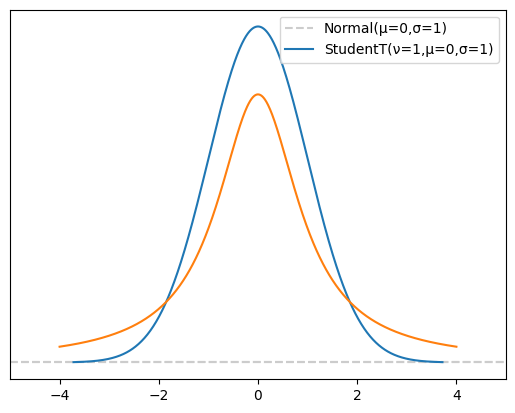

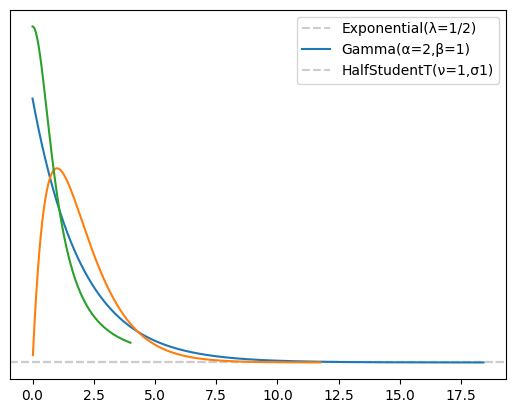

In [15]:
import matplotlib.pyplot as plt

dist1 = pz.Normal(mu=0, sigma=1)
dist2 = pz.StudentT(nu=1, mu=0, sigma=1)

dist1.plot_pdf()
dist2.plot_pdf(support=(-4,4))
plt.legend(['Normal(μ=0,σ=1)', 'StudentT(ν=1,μ=0,σ=1)'])
plt.xlim(-5,5)
plt.show()

dist3 = pz.Exponential(lam=1/2)
dist4 = pz.Gamma(alpha=2, beta=1)
dist5 = pz.HalfStudentT(nu=1, sigma=1)

dist3.plot_pdf()
dist4.plot_pdf()
dist5.plot_pdf(support=(0, 4))
plt.legend(['Exponential(λ=1/2)', 'Gamma(α=2,β=1)', 'HalfStudentT(ν=1,σ1)'])
plt.show()

**Task5:**

Find the first four moments of the the distributions from Task4. Then,

Determine which of those five dsitributions has the largest and smallest: mean, variance, skew, and kurtosis.

Those distributions are repeated here for conveniencce: $Normal(μ=0,σ=1)$, $StudentT(ν=1,μ=0,σ=1)$,  $Exponential(λ=1/2)$, $Gamma(α=2,β=1)$, $HalfStudentT(ν=1,σ1)$

In [16]:
for x in pz.Normal(mu=0, sigma=1).moments():
  print(x, end="\t")
print("Normal(0,1)")

## Changes nu to 4 to allow moments to be computed
for x in pz.StudentT(nu=4, mu=0, sigma=1).moments():
  print(x, end="\t")
print("StudentT(4,0,1)")

for x in pz.Exponential(lam=1/2).moments():
  print(round(x,3), end="\t")
print("Exp(1/2)")

for x in pz.Gamma(alpha=2, beta=1).moments():
  print(round(x,3), end="\t")
print("Gamma(2,1)")

# changed nu to 5 to allow for moments to be calculuated (the third and fourth moments are not implemented though)
for x in pz.HalfStudentT(nu=5, sigma=1).moments():
  print(str(x)[0:5], end="\t")
print("HalfStudentT(5,1)")

0.0	1.0	0	0	Normal(0,1)
0.0	2.0	0	inf	StudentT(4,0,1)
2.0	4.0	2	6	Exp(1/2)
2.0	2.0	1.414	3.0	Gamma(2,1)
0.949	0.766	NotIm	NotIm	HalfStudentT(5,1)


The Normal and StudentT both have the lowest mean. The Exponential and Gamma both have the highest mean.  
  
The HalfStudentT has the lowest variance, the Exponential has the highest variance.  
  
The Normal and StudentT have the lowest skew, the Exponential has the highest skew.  
  
The StudentT has the highest kurtosis, the Normal has the lowest kurtosis.

**Task6**:

What x values do the Exponenital, Gamma, HalfSutdentT, and HalfNormal functions support? Why plot them on the same graph?

What x values do the Normal and T distribution support? Why plot them on the same graph?

What x values does the Beta distribution support?

The exp, gamma, halfT, and half normal all support positive real x values. The norm and tDist support all real numbers. We split these up into graphs where we plot them together because they share the same domains and can be seen together. This is useful because then we can compare the shape more easily. The beta distribution supports just 0 as a domain.

**Task7**:

Can a distribution with support $[0,∞]$ have negative (or left) skew? If so, plot that specific distribution.

0.998	6.545	-1.12	2.342	Weibull(500,1)


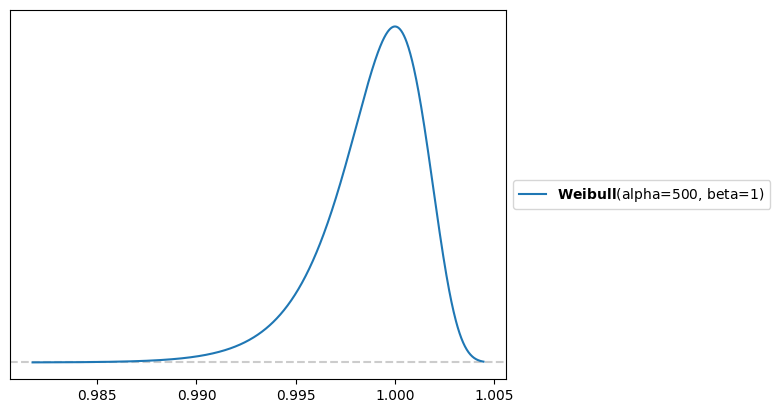

In [17]:
# I credit Yale for help on finding this function
a = pz.Weibull(alpha = 500,beta = 1)
a.plot_pdf()
for x in a.moments():
  print(str(x)[0:5], end="\t")
print("Weibull(500,1)")


**Task8**:

Name a distribution that supports the real numbers with variance equal to 1, 0 skew, and 0 kurtosis.

Normal Distribution

**Task9**:

Name a distribution with support $(-∞,∞)$ and that has negative skew.

Skew Normal / Skew StudentT (credit to Yale for not giving me a moment to answer the question and saying the answer over my shoulder)

**Optional Task**:

What are the maximum entropy conditions for the normal and gamma distributions?


The normal distribution has a maximum entropy from the real nmumbers, meaning that the input must be a real number. The gamma distribution on the other hand requires a non negative input. Additionally, the normal and gamma distributions follow the principle of maximum entropy, meaning that it is the distribution attempting to minimize any bias in the distribution.

###Playing with Discrete Distributions

**Task10**:

Plot the pdfs (techincally the pmfs) of the following distributions: $Bernoulli(p=0.7)$, $Binomial(n=10,p=0.7)$, $Poisson(μ=7)$, $Geometric(p=0.7)$, $HyperGeometric(N=50,k=35,n=15)$, $Categorical(p=[0.05,0.3,0.05,0.1,0.2,0.4])$

Additionally, compute the first four moments for all those distributions--except the Categorical distribution.

0.7		0.21		-0.87		-1.24		Bernoulli(p=0.7)
7.0		2.1		-0.28		-0.12		Binomial(n=10,p=0.7)
7.0		7.0		0.38		0.14		Poisson(μ=7)
1.43	0.61	2.37	7.63	Geometric(p=0.7)
10.5	2.25	-0.11	-0.09	HyperGeometric(N=50,k=35,n=15)


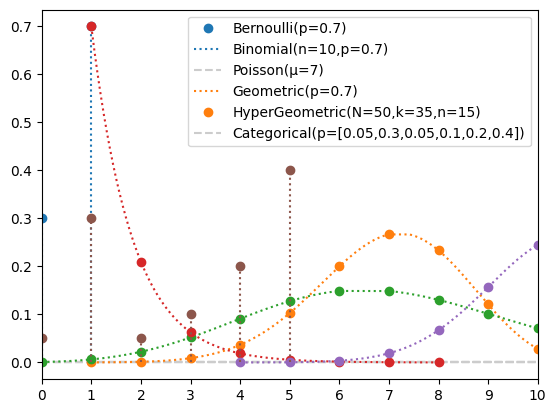

In [18]:
dist1 = pz.Bernoulli(p=0.7)
dist2 = pz.Binomial(n=10, p=0.7)
dist3 = pz.Poisson(mu=7)
dist4 = pz.Geometric(p=0.7)
dist5 = pz.HyperGeometric(N=50, k=35, n=15)
dist6 = pz.Categorical(p=[0.05,0.3,0.05,0.1,0.2,0.4])

for x in dist1.moments():
  print(round(x,2), end="\t\t")
print("Bernoulli(p=0.7)")
for x in dist2.moments():
  print(round(x,2), end="\t\t")
print("Binomial(n=10,p=0.7)")
for x in dist3.moments():
  print(round(x,2), end="\t\t")
print("Poisson(μ=7)")
for x in dist4.moments():
  print(round(x,2), end="\t")
print("Geometric(p=0.7)")
for x in dist5.moments():
  print(round(x,2), end="\t")
print("HyperGeometric(N=50,k=35,n=15)")



dist1.plot_pdf()
dist2.plot_pdf()
dist3.plot_pdf()
dist4.plot_pdf()
dist5.plot_pdf()
dist6.plot_pdf()

plt.legend(['Bernoulli(p=0.7)', 'Binomial(n=10,p=0.7)', 'Poisson(μ=7)', 'Geometric(p=0.7)', 'HyperGeometric(N=50,k=35,n=15)', 'Categorical(p=[0.05,0.3,0.05,0.1,0.2,0.4])'])
plt.xlim(0,10)
plt.show()

**Task11**:

Describe what processes "generate" each of the previous discrete distributions models. Also report their support.

Here's a spicier way to phrase the question: describe these distributions' maximum entropy conditions in english.

Hint: Make sure to read any of the: preliZ documentation, relevant wikipedia articles, or wolfram alpha.


Bernoulli describes the probabilities of successes and failures as 1s and 0s. This distribution has a support of 0,1.  
  
The binomial distribution is given by a function that takes some n and some p that creates a distribution based on the choose function. The support is all positive integers.

The Poisson  distribution takes in some mu and creates a model based on that mu and an equation where we take $\frac{e^{-u}u^x}{x!}$. The support for the Poisson distribution is all natural numbers.

A geometric distribution essentially repeats trial until a success, resulting in a distribution model. The support is all Natural numbers.

The hypergeometric distribution models the probability of x successes in a sequence of n bernouli trials taken without replacement. The support is (max(0,n-N+K), min(k,n)).

The categorical distribution is a general discrite distribution where each data point is some discrete point in the model. The support is all integers from 0 to p-1.